# Fraud Detection

Find this notebook on Github: 


### Fraud detection is a set of activities undertaken to prevent money or property from being obtained through false pretenses. Fraud detection is applied to many industries such as banking or insurance. Such acts of fraud detection has financially affected a lot of individuals as well as organizations.

#### Unlike the old times, we can use the help of the current bleeding edge technologies to gain advantages over the scamsters. Using Machine Learning for Fraud Detection is one such example. Machine learning models are able to learn from patterns of normal behavior. They are very fast to adapt to changes in that normal behaviour and can quickly identify patterns of fraud transactions. This means that the model can identify suspicious customers even when there hasn't been a chargeback yet.

The libraries used for in this notebook are given below:
1. Sklearn
- Scikit-learn is a free software machine learning library for the Python 
programming language.
- This library contains various machine learning models in the form of objects, some of which are used in this notebook aswell
- Apart from this, it is also useful because of it's various other features, like test_train_split, classification_report and various other functions.


2. Numpy and Pandas
- NumPy is a library for Python that adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 
- Pandas is a high-level data manipulation tool that is built on the NumPy package.


3. Matplotlib and Seaborn
- Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. 
- Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.


4. Google Colab
- This is the library made for Google Colab
- Using this library, one can import datasets in the developing notebook by extracting the same from the Google Drive associated with the accound

##Importing Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Importing the dataset from Google Drive 

In [39]:
from google.colab import drive 
drive.mount('/content/gdrive')
fraud_data = pd.read_csv('gdrive/My Drive/Fraud.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


If you are running this on Jupyter Notebook, then un-comment and run the cell below before running the above cell  

In [40]:
# fraud_data = pd.read_csv("Fraud.csv")

## Data Exploration

In the cells below, we are going to analyse the data, make some nessesary modifications as well as perform some data cleaning if nessesary

In [41]:
# This provides us with the whole information about the given dataset. We can have a glimpse of the data using the below table
fraud_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


After analysing the whole data, we can come to a comclusiion that the cells named 'nameOrig' and 'nameDest' can be removed from the dataset since they do not affect the fraud probablity

In [42]:
# The code below removes the colums named 'nameOrig' and 'nameDest' from the dataset
fraud_data = fraud_data.drop(['nameOrig' , 'nameDest'] , axis=1)

Now that we have removed the unnesesary colums from the dataset, we should check the size of the data we have to deal with

In [43]:
# The tuple returned by the function is in the form (Rows , Columns)
fraud_data.shape

(6362620, 9)

It is clear that the data we have to perform predictions on is has 6362620 rows and 9 colums

In [44]:
# This function returns some useful statistics about the data, which might be useful
fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Let us get the list of all the columns present in the dataset

In [45]:
cols = list(fraud_data.columns)
print("All the columns in the given dataset is: ")
for i in cols:
    print(str(cols.index(i) + 1) + ".) " + i)

All the columns in the given dataset is: 
1.) step
2.) type
3.) amount
4.) oldbalanceOrg
5.) newbalanceOrig
6.) oldbalanceDest
7.) newbalanceDest
8.) isFraud
9.) isFlaggedFraud


Before moving further, we should check for the existance of any null value in the daabase. Having null values would affect the accuracy of the database and hence we should perform nessessary actions before commencing the predictions

In [46]:
# This function returns all the columns and the number of null values in the corrosponding column
fraud_data.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

As we can see, there are no null values present in the database and hence there is no need of performing any operations for the same

Before moving to the prediction part, we should check the datatypes all the columns are holding

In [47]:
# This function gives the basic information about all the cells in the database
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


Here, we can see that the 'type' column is an object. This means we have to work upon it and convert it into machine-understandable form ie, numbers. Hence, we perform the following operation on the column

In [48]:
# Firstly, we check for all the unique values present in this column
fraud_data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

We have 5 different entities present in the 'type' column. Hence, we can convert these 5 entities to numbers, labeled from 0 to 4. 

This process is called Label Encoding and this operation is performed in the cells below

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
fraud_data['type'] = label_encoder.fit_transform(fraud_data['type'])

Now, since the encoding is done, let us check again for this column and find out the unique values present in this column

In [50]:
fraud_data['type'].unique()


array([3, 4, 1, 2, 0])

# Heatmap and Correlations

## A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

We can create a heatmap for our database. This can be done using the Seaborn Library. This library is used to create graphs, histograms, heatmaps and various other plots

Firstly, we develop a correlation matrix. 

A correlation matrix is simply a table which displays the correlation. It is best used in variables that demonstrate a linear relationship between each other.

In [51]:
# This funcion returns the correlation matrix of the given dataset. We have stored this matrix in the variable called fraud_data_correlations
fraud_data_correlations = fraud_data.corr()

Now that we have our correlation matrix, let us use this to draw the heatmap of the given dataset

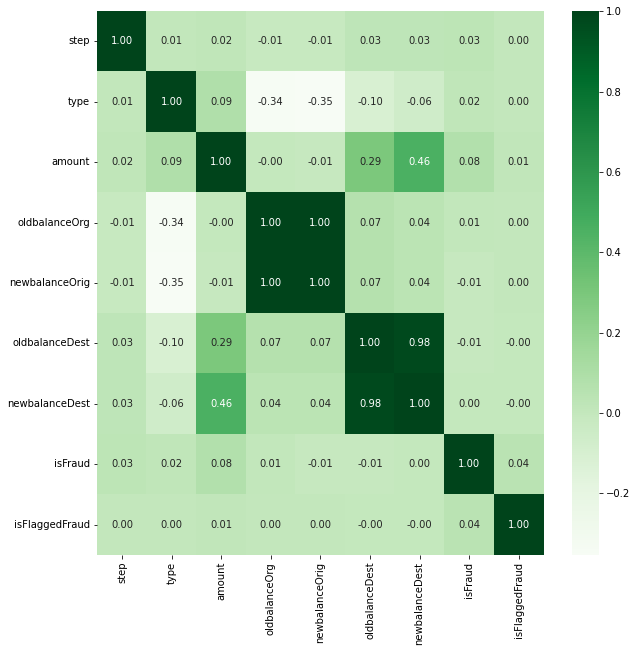

In [52]:
# Plt.figure creates a 10 x 10 space to draw the heatmap
# Seaborn's heatmap() function takes the correlation matrix as a parameter along with some other parameters to develop the requeired heatmap

plt.figure(figsize=(10,10))
sns.heatmap(fraud_data_correlations , cmap="Greens" , annot=True , fmt = '.2f')

## Some Other Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41d87ec150>,
      dtype=object)

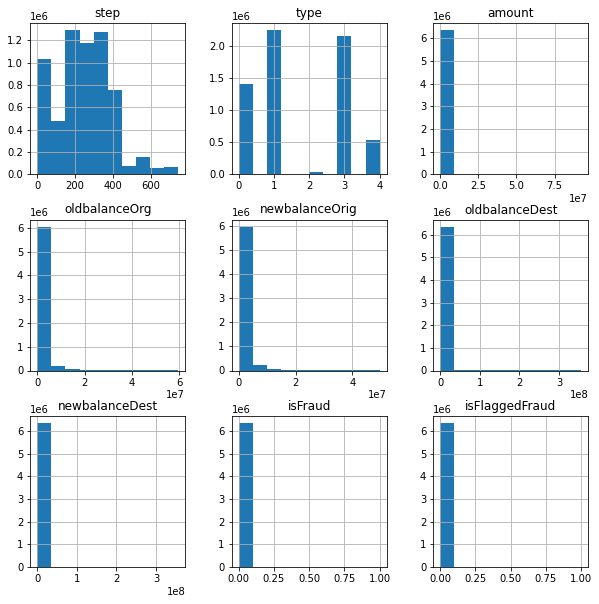

In [53]:
fraud_data.hist(figsize=(10,10) , align = 'mid')

We can also check the number of distinct values present in the isFraud column, which is our target variable.

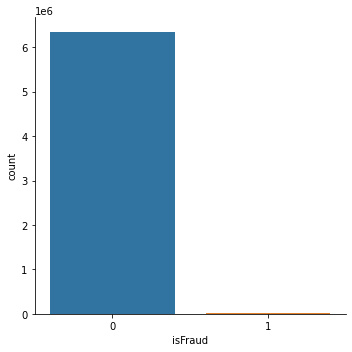

In [54]:
sns.catplot(x='isFraud', data = fraud_data, kind = 'count')
# Only 2 values of isFraud|

As we can see, the target column has 2 unique values, which is 0 and 1. Also, we can see that the number of fraud entities are less than the number of non-fraud entities

# Model Division into X and y

Now that we have analysed, processed, and plotted the data, we now move on for predicting values using the given dataset.


Firstly, we bifurcate the data into X (Set of all columns which are provided to the model for prediction) and y (Set of the column which acts as the output) 

In [55]:
# Here, we distinguish the data as follows
X = fraud_data.drop('isFraud' , axis=1).values
y = fraud_data['isFraud'].values

Further, we split the data into Testing and Training Data.
This helps us in developing a model which neither overfits not underfits

We use the train_test_split() function in the Sklearn Library to perform this split the data.

While the variables X_train and y_train are used to train the prediction model, the variables X_test and y_test are used to test the model

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Do the standard scaling as well

## Scaling the data

Scaling the data is important, especially when you have a dataset has data which varies in numbers.

In our case, we can see the data has transaction details, which varies in 5-6 figures. At the same time, we also have data which varies in 0s and 1s. Hence, we can say that standardization of the data is very important in our case

To perform the same, we use the StandardScaler function present in the Sklearn Library. The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.


In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Model Testing

Now comes the time to implement various models and test them. Based on the accuracy these models provide while testing on the data, we would in the end decide which of the tested machine learning models would be the best for the optimum Fraud detection

In this case, we test our data on the given machine learning models:
1. Random Forests
2. Logistic Regression
3. Naive Bayes

The reason behind specificaly choosing these 3 models are that these machine learning models are famous in classification problems, fraud detection being one of them. 

(While there could have been other models in the list as well, we are sticking to these 3 models due to the hardware limitations as well as the large nature of the given dataset)

In [58]:
# This is a dictionary which is made to compare the different machine learning models.
# This dictionary has the following structure
# ---- Key: The name of the machine learning model
# ---- Value: The accuracy score of the same model 

model_accuracy = {}


In [59]:
# Importing some other libraries which might be helpful while implementing the machine learning models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## 1.) Random Forest

Here we are using the RandomForestClassifier object present in the Scikitlearn library to implement the machine learning model about the fraud_data.

Apart from this, we also use the Accuracy Score to finally find the accuracy of the model as well as Classification Report to draw other statistics about the model

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5 , random_state = 100).fit(X_train, y_train)
y_predict = rf.predict(X_test)

In [ ]:
score = rf.score(X_test, y_test)
model_accuracy['Random Forest'] = score
print(score)

In [61]:
classificationReport = classification_report(y_test, y_predict)
print(classificationReport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270855
           1       0.94      0.59      0.73      1669

    accuracy                           1.00   1272524
   macro avg       0.97      0.80      0.86   1272524
weighted avg       1.00      1.00      1.00   1272524



## 2.) Logistic Regression

Here we are using the LogisticRegression object present in the Scikitlearn library to implement the machine learning model about the fraud_data.

Apart from this, we also use the Accuracy Score to finally find the accuracy of the model as well as Classification Report to draw other statistics about the model

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 100).fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [29]:
score = lr.score(X_test, y_test)
model_accuracy['Logistic Regression'] = score
print(score)

0.9992102310054664


In [30]:
classificationReport = classification_report(y_test, y_predict)
print(classificationReport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270880
           1       0.91      0.43      0.59      1644

    accuracy                           1.00   1272524
   macro avg       0.95      0.72      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



## 3.) Naive Bayes

Here we are using the GaussianNB object present in the Scikitlearn library to implement the machine learning model about the fraud_data.

Apart from this, we also use the Accuracy Score to finally find the accuracy of the model as well as Classification Report to draw other statistics about the model

In [31]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [32]:
score = gnb.score(X_test , y_test)
model_accuracy['Naive Bayes'] = score
print(score)

0.0028023047109524066


In [33]:
classificationReport = classification_report(y_test, y_predict)
print(classificationReport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270880
           1       0.91      0.43      0.59      1644

    accuracy                           1.00   1272524
   macro avg       0.95      0.72      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



## Model Analysis
Now that we have implemented all the machine learning models and drawn their scores, it is time to check which one of them would be the most suitable for fraud detection

Let's recall all the models we implemented and their accuracy as well

In [34]:
score = -1;
model_name = None;
for model , accuracy in model_accuracy.items():
  print(str(model) + " : " + str(accuracy))
  if(accuracy > score):
    # print(model)
    model_name = model;
    score = accuracy

Random Forest : 0.9991646522973241
Logistic Regression : 0.9992102310054664
Naive Bayes : 0.0028023047109524066


And the model with the highest score is the one which we would choose for fraud detection

In [35]:
print("The most accurate model for prediction is: " + model_name)

The most accurate model for prediction is: Logistic Regression


Finally, we are using 


## Random Forest

As our prediction model for the fraud detection dataset

## User-based Predictive System 

This is the last part of this notebook. Here, the user can run the cells below by which he would be able to enter his/her inputs and thereafter obtain the output after the machine learning model (Random Forest in this case) predicts the same using the data provided by the user.

In [36]:
for cols in fraud_data.columns:
  print(cols)

step
type
amount
oldbalanceOrg
newbalanceOrig
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


Run the cell below and thereafter enter the entities to generate the output.
Developers: You can comment the input() lines and un-comment the commented lines for ease of handling

In [62]:
step = input("Enter the hour at which the fraud happened.\n(For more information, refer to the docs mentioned above): \n")
type = input("\nEnter the type of fraud that happened.\n(Choose between 0 - CASH_IN, 1 - CASH_OUT, 2 - DEBIT, 3 - PAYMENT, 4 - TRANSFER): \n")
amount = input("\nEnter the amount associated with the fraud: \n")
oldbalanceOrg = input("\nEnter the initial amount before the transaction: \n")
newbalanceOrig = input("\nEnter the new amount before the transaction: \n")
oldbalanceDest = input("\nEnter the initial balance recipient before the transaction.\n(Note that there is not information for customers that start with M (Merchants)): \n")
newbalanceDest = input("\nEnter the new balance recipient after the transaction.\n(Note that there is not information for customers that start with M (Merchants)): \n")
isFlaggedFraud = input("\nEnter whether the given transaction was flagged as fraud or not.\n(Enter 1 for Marked as Fraud and 0 as Marked as Non-Fraud): \n")

# # step = 1 
# # type = 3
# # amount = 9839.64
# # oldbalanceOrg = 170136.00
# # newbalanceOrig = 160296.36
# # oldbalanceDest = 0.00 
# # newbalanceDest = 0.00
# # isFraud = 0
# # isFlaggedFraud = 0

Enter the hour at which the fraud happened.
(For more information, refer to the docs mentioned above): 
1

Enter the type of fraud that happened.
(Choose between 0 - CASH_IN, 1 - CASH_OUT, 2 - DEBIT, 3 - PAYMENT, 4 - TRANSFER): 
3

Enter the amount associated with the fraud: 
9839.64

Enter the initial amount before the transaction: 
170136.00

Enter the new amount before the transaction: 
160296.36

Enter the initial balance recipient before the transaction.
(Note that there is not information for customers that start with M (Merchants)): 
0.00

Enter the new balance recipient after the transaction.
(Note that there is not information for customers that start with M (Merchants)): 
0.00

Enter whether the given transaction was flagged as fraud or not.
(Enter 1 for Marked as Fraud and 0 as Marked as Non-Fraud): 
0


Now that we have the data from the users, we have to convert it into the form which our model can understand. This is why we add these entities in a tuple, generate an array from this tuple and thereafter reshape this array from horizontal to vertical orientation. 

In [63]:
user_input = (step , type , amount , oldbalanceOrg , newbalanceOrig , oldbalanceDest , newbalanceDest , isFlaggedFraud)
user_input_array = np.asarray(user_input)
user_input_array_reshape = user_input_array.reshape(1,-1)

Now that we have the information processed, we can conclude predictions by sending this data to the machine learning model. The below cell performs this operation and thereafter the result is compared using an if-else statement to conclude whether the transaction was fraud or not a fraud

In [64]:
prediction = rf.predict(user_input_array_reshape)
# print(prediction)

if(prediction == 1):
    print("Fraud is probable")
else:
    print("Fraud is not probable")

Fraud is probable


## Summary

- We were given the 'Fraud.csv' data. Our task was to handle the data and come up with a prediction whether any given transaction is Fraud or not Fraud

- Firstly, we analysed the data and removed the cells which were unnessesary to pass to the machine learning model. Thereafter the data was checked for null values, which were not present. Finally, categorical changes were done for the colums which had classified values 


- Heatmap of the given dataset was generated using the correlation matrix. This heatmap helped us analyse the various columns in the dataset and the effect of the entities on one another. Other plots were also drawn which gave more insight about the dataset

- Before moving to the predictions using machine learning models, we created variables of the target column as well as the labels. Thereafter, we split these variables to create 2 segments of data, one meant for training the model and the other one meant for testing the model trained on the training data. Scaling of the data was also done keeping in mind the diversity of values present in the columns

- For selecting the best model for fraud detection, we implement the following machine learning models on the given fraud data:
  
  -- Random Forest
  -- Logistic Regression
  -- Naive Bayes

- These models were implemented and the scores of these models were stored in a dictionary alond with the name of the model. Also, additional statistics about the models were also drawn.

- Finally, we compare the scores of all the models by using the dictionary created and hence concluded that RandomForestClassifier comes out to be the best model for fraud detection.

- We concluded the prediction by implenting a User-based Predictive System, where the user is free to enter his information and predict fraud detection. This is done by first taking all the information from the user, converting it into model-understandable form, predicting the outcomes and thereafter drawing the conclusion whether the transaction was actually fraud or not.

# Thank You

In [65]:
# A notebook by:

## Ishaan Joshi
### LinkedIn: https://www.linkedin.com/in/joshiishaan/
### Github: https://github.com/hiferli